In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import speckle_stuffs as spkstf
import pickle
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
rootff = ''
root_folder =  rootff+'/22459829431967/'

In [4]:
pickles = [root_folder+ff for ff in os.listdir(root_folder) if ff.split('.')[-1]=='pickle']
df = pd.DataFrame(columns=['dataset', 'error_progression', 'components', 'correlation','correlation std'])

for picklesource in pickles:
    filehandler = open(picklesource, 'rb')
    try:
        [extr_traces, extr_footprints, dpars] = pickle.load(filehandler)
        filehandler.close()
    except:
        filehandler.close()
        continue
    
    gt =  rootff+picklesource.split('/')[-1].split('_')[1] + os.sep+ '_'.join((picklesource.split('/')[-1]).split('_')[:3])+'_gt.mat'                     
    grtrh_traces = spkstf.extract_traces_from_mat(gt)
    couplings = np.array(spkstf.find_trace_couplings(grtrh_traces, extr_traces))
    
    pixelcout = np.prod(np.shape(extr_footprints[0]))
    df = df.append({
        'dataset':':'.join(picklesource.split('_')[1:3]),
        'components':dpars['components'],
        'error_progression':dpars['error_progression']/np.max(dpars['error_progression']),
        'correlation':np.mean(couplings[:,2]),
        'correlation std':np.std(couplings[:,2])
    }, ignore_index=True)

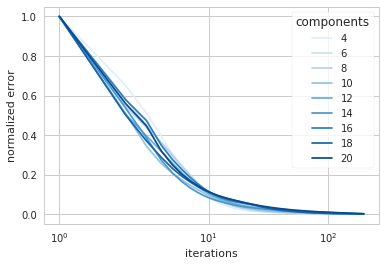

In [8]:
import seaborn as sns
palt = sns.color_palette("Blues", 9)
sns.set(style="whitegrid", palette=palt)

plt.figure(figsize=(6, 4))

for idx, row in df.sort_values('components').iterrows():
    plt.plot(range(1, len(row['error_progression'])+1), row['error_progression'], label=row['components'])
plt.legend(title='components', frameon=True)
plt.xscale('symlog')
plt.xlabel('iterations')
plt.ylabel(r'normalized error')

plt.savefig(rootff+'/error_progression.pdf', dpi=300)
plt.show()